In [1]:
# Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge, Lasso

In [3]:
# Load the dataset

In [4]:
data = pd.read_csv('USA_Housing-1.csv')

In [5]:
# Check the dataset variable description

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
# There are 5 numeric variables and 1 categorical variable

In [8]:
# Display the dimension of the dataset

In [9]:
data.shape

(5000, 7)

In [10]:
## There are 5,000 rows and 7 columns in the dataset 

# Explore the dataset
# Display 20 random sample of the dataset

In [11]:
data.sample(20, random_state=0)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
398,61200.726175,5.299694,6.234615,4.23,42789.692217,8.942511e+05,"45153 Salas Hollow Apt. 148\nWest Erica, SD 93725"
3833,63380.814670,5.344664,6.001574,2.45,40217.333577,9.329794e+05,"3499 Stuart Plains Suite 304\nAaronhaven, NE 8..."
4836,71208.269301,5.300326,6.077989,4.01,25696.361741,9.207479e+05,"796 Joshua Forges Suite 834\nBensonside, CA 82761"
4572,50343.763518,6.027468,5.160240,4.35,27445.876739,6.918549e+05,"400 Allen Lodge Apt. 145\nBernardfort, NV 57316"
636,54535.453719,5.278065,6.871038,4.41,30852.207006,7.327332e+05,146 Christopher Lights Suite 182\nNew Kathysid...
2545,77459.757856,4.282450,5.980079,4.48,37910.294982,9.452522e+05,"58899 Bender Brooks\nKimberlyshire, GU 39917-0152"
1161,44088.274183,7.557643,5.581041,2.44,31032.920303,6.244828e+05,"71471 Mcgrath Passage Apt. 044\nMendezville, N..."
2230,58874.273843,6.342055,6.645742,2.11,19772.521662,8.495661e+05,"480 Mejia Trail Apt. 386\nDebrafort, IL 34297-..."
148,90975.113272,4.740683,8.320352,6.45,44426.213648,1.544380e+06,"4447 Steven River Suite 076\nWest Karenmouth, ..."
2530,77825.227469,6.720493,7.425285,5.17,31439.971219,1.535262e+06,"481 Fisher Bridge\nEast Christina, NV 36023-3431"


In [12]:
# Inference Statistics - Statistical Analysis

In [13]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,NaN,NaN,NaN,68583.108984,10657.991214,17796.63119,61480.562388,68804.286404,75783.338666,107701.748378
Avg. Area House Age,5000.0,NaN,NaN,NaN,5.977222,0.991456,2.644304,5.322283,5.970429,6.650808,9.519088
Avg. Area Number of Rooms,5000.0,NaN,NaN,NaN,6.987792,1.005833,3.236194,6.29925,7.002902,7.665871,10.759588
Avg. Area Number of Bedrooms,5000.0,NaN,NaN,NaN,3.98133,1.234137,2.0,3.14,4.05,4.49,6.5
Area Population,5000.0,NaN,NaN,NaN,36163.516039,9925.650114,172.610686,29403.928702,36199.406689,42861.290769,69621.713378
Price,5000.0,NaN,NaN,NaN,1232072.654142,353117.626581,15938.657923,997577.135049,1232669.377966,1471210.204212,2469065.594175
Address,5000,5000,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Observation 

-  The average household income varies from 17796 to 107702.

- The average area house age ranges from 2.6 to 10 indicating that the housing age was scaled from 1 to 10.

-  The average area number of rooms ranges from 3.24 to 10.76 indicating that the rooms are scaled between 1 to 12.

-  The average area of number of bedrooms varies from 2 to 6.5.

-  The housing price range varies from 15938 to 2469065 with 50% of house price above 12326669 

In [14]:
## Checking for missing value

In [15]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

# There are no missing value found in the dataset

In [16]:
## Checking for duplicate value

In [17]:
data.duplicated().sum()

0

In [18]:
# There is no duplicate entry found in the dataset

In [19]:
# Obtaining unique columns in numeric variables

In [20]:
num_column = data.select_dtypes(exclude='object').columns.tolist()

In [21]:
num_column

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price']

In [22]:
for col in num_column:
    print(data[col].value_counts)
    print('-'*80)

<bound method IndexOpsMixin.value_counts of 0       79545.458574
1       79248.642455
2       61287.067179
3       63345.240046
4       59982.197226
            ...     
4995    60567.944140
4996    78491.275435
4997    63390.686886
4998    68001.331235
4999    65510.581804
Name: Avg. Area Income, Length: 5000, dtype: float64>
--------------------------------------------------------------------------------
<bound method IndexOpsMixin.value_counts of 0       5.682861
1       6.002900
2       5.865890
3       7.188236
4       5.040555
          ...   
4995    7.830362
4996    6.999135
4997    7.250591
4998    5.534388
4999    5.992305
Name: Avg. Area House Age, Length: 5000, dtype: float64>
--------------------------------------------------------------------------------
<bound method IndexOpsMixin.value_counts of 0       7.009188
1       6.730821
2       8.512727
3       5.586729
4       7.839388
          ...   
4995    6.137356
4996    6.576763
4997    4.805081
4998    7.130144
4999   

# Observation
 -  About 50% of the household earn above 68,000 and about 75% of the household earns above 75,000
 
 -  The age range of the household occupant is between 1 and 10 while about 50% of households live in room 7 

# Univariate Analysis

In [23]:
from functions import histogram_boxplot,labeled_barplot, model_performance_regression,tunealpha

In [24]:
## Visualize Avg Area House Age

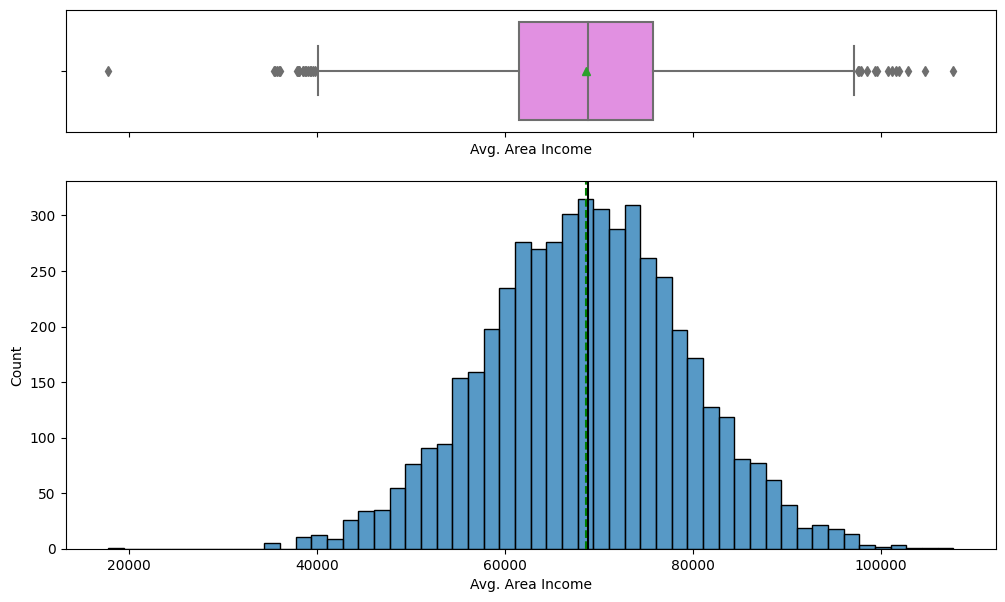

In [25]:
histogram_boxplot(data=data, feature='Avg. Area Income')

# Observation
- Avg Area Income appears to be more right skewed than the left skew. 
- There are several outliers both at the right and left upper ends.

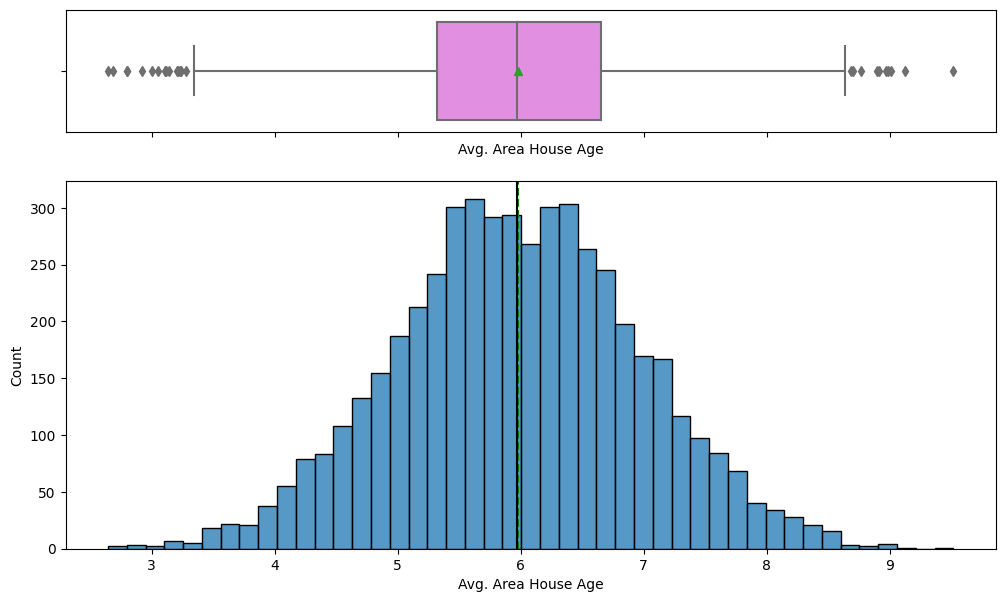

In [26]:
histogram_boxplot(data=data, feature='Avg. Area House Age')

# Observation
- The Avg Area House Age appears to have left skewed. 
- There are more outliers at both the left and right upper end.

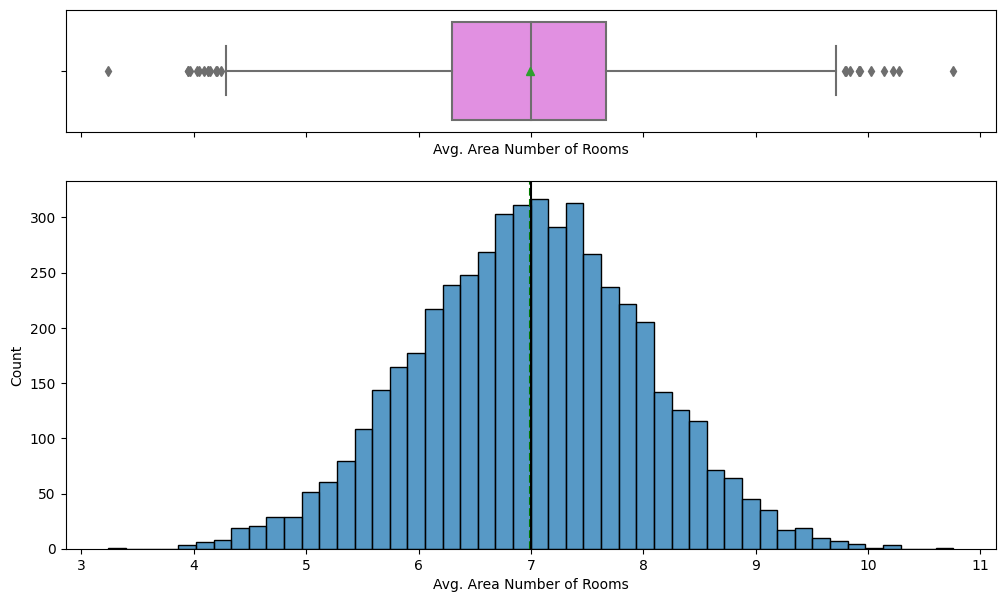

In [27]:
histogram_boxplot(data=data, feature='Avg. Area Number of Rooms')

** Observation
- The Avg. Area Number of Rooms appears to be left skewed. 
- There are several outliers at both upper and lower ends.

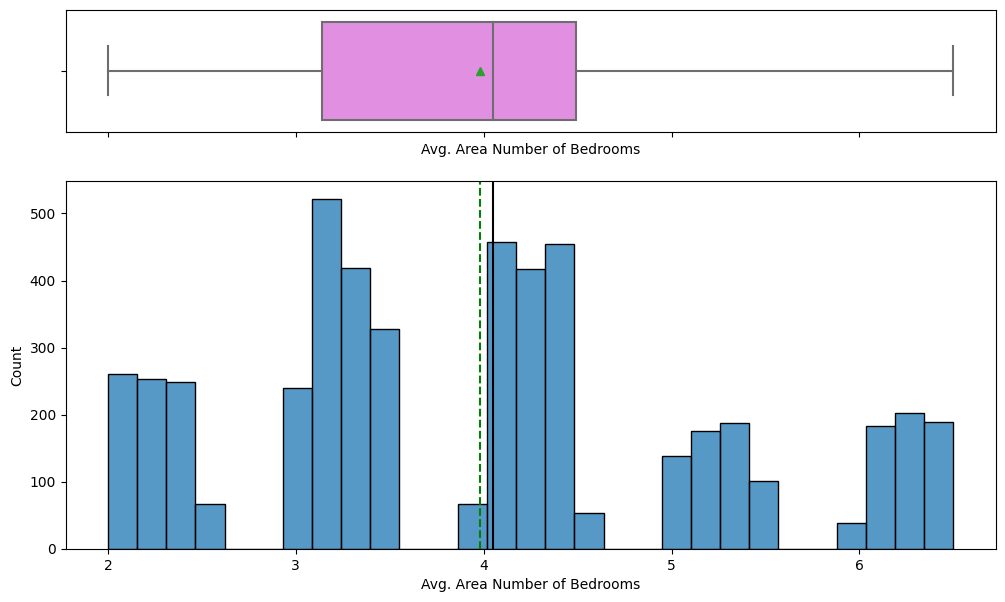

In [28]:
histogram_boxplot(data=data, feature='Avg. Area Number of Bedrooms')

***Observation
- Avg. Area Number of Bedrooms appears to have zero skewed. 
- There is no outlier in this variable indicating a normal distribution

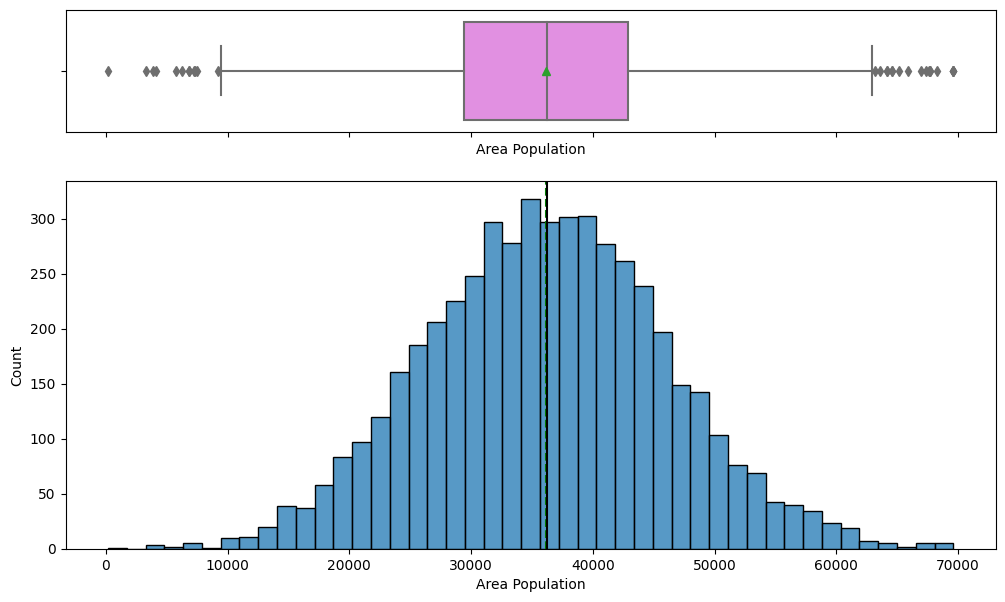

In [29]:
histogram_boxplot(data=data, feature='Area Population')

# **Observation
- Area population appears to be right skewed. There are several outliers at both the upper and lower end of the variable indicating that area population is very high

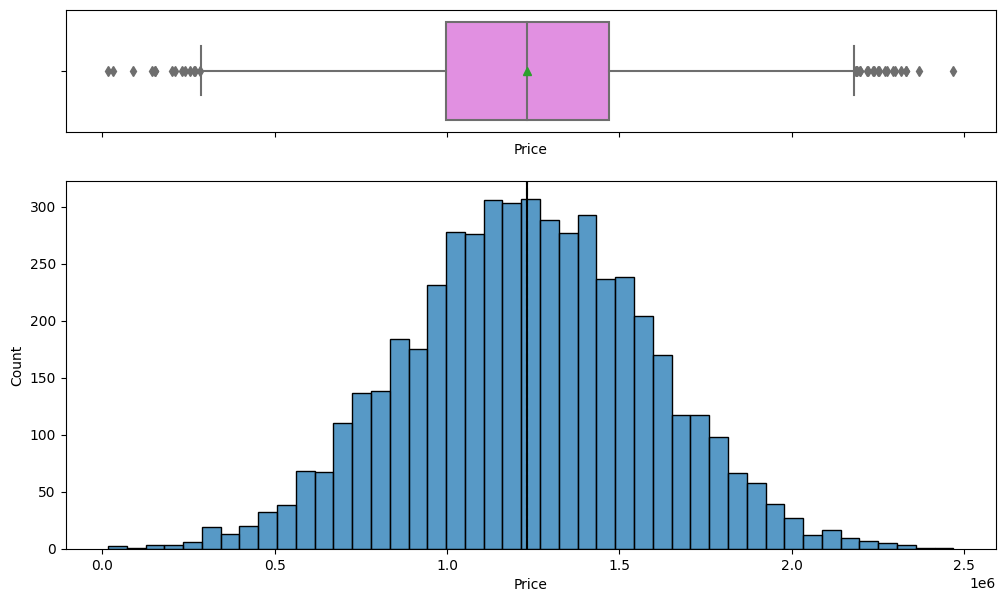

In [30]:
histogram_boxplot(data=data, feature='Price')

 **Observation
- The housing price appears to be right skewed. 
- There are several outliers at both the upper and lower end indicating the price of houses is very high
- The price of the houses ranges from 0 to 2.5 in 

# Correlation

C:\Users\User\AppData\Local\Temp\ipykernel_22132\209800838.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True,vmin=-1, fmt=".2f", cmap="Spectral")


<AxesSubplot: >

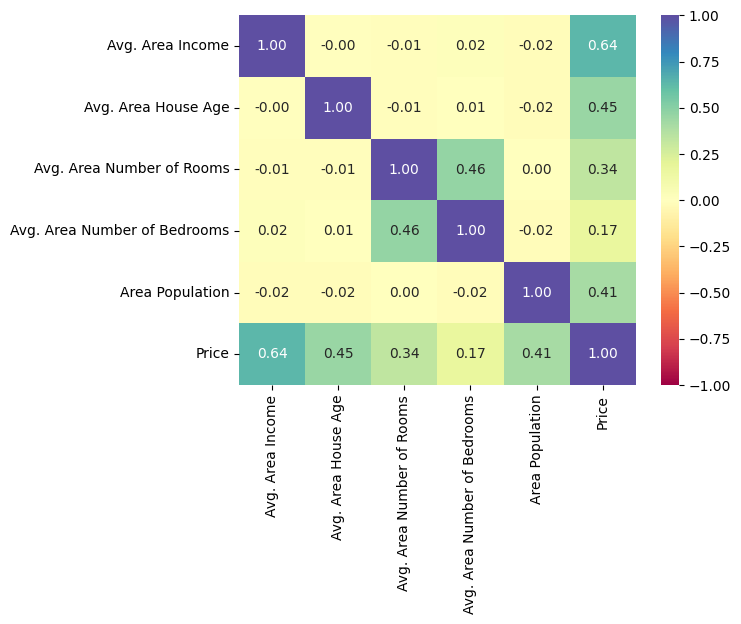

In [31]:
sns.heatmap(data.corr(), annot=True,vmin=-1, fmt=".2f", cmap="Spectral")

# Observation

- A one percent change in Avg Area Number of Rooms constitutes a 46% increase in Avg Area Number of Bedrooms
- A one percent change in Area population constitutes a 41% increase in house price
- A one percent change in Avg Area House Age constitutes a 45% increase in house price
- An increase in Avg Area Number of Rooms constitutes a 34% increase in house price

In [32]:
# Determine the features by dropping the address and price column

In [33]:
X = data.drop(["Address","Price"], axis=1)

In [34]:
## Making Price as the target variable

In [35]:
y = data['Price']

In [36]:
# Splitting the dataset into 70% train and 30% test

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [38]:
# Normalising the data with the mean of 0 and standard deviation of 1

In [39]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [40]:
## Building linear regression model

Let's check the performance of the model using different metrics.

- We will be using RMSE, MAE, and  𝑅2 and Adjusted R2 metric functions defined in sklearn RMSE
- The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

In [41]:
lr = LinearRegression()
lr.fit(x_train_sc,y_train)

LinearRegression()

In [42]:
## Checking the different metrics of the model on training

In [43]:
model_performance_regression(lr,x_train_sc,y_train)

,RMSE,MAE,R-Squared,Adj R2 Squared,MAPE
0,100848.566455,81265.307291,0.917071,0.916952,7.662375


In [44]:
## Checking the different metrics of the model on testing

In [45]:
model_performance_regression(lr,x_test_sc,y_test)

,RMSE,MAE,R-Squared,Adj R2 Squared,MAPE
0,101672.699523,81563.14734,0.920076,0.919808,7.511446


Observation
- Both the train and test data have high Root Mean Square Error indicating that the model has more than 9% errors
- Mean Absolute Percentage Error is ~7.6% on training and 7.5 on testing data
- The Adjusted R2 Squared has a high variance of housing price at 91% 

Regularisation of the model using Ridge and Lasso 

In [46]:
ridge = Ridge()
ridge.fit(x_train_sc,y_train)

Ridge()

In [47]:
tunealpha(Ridge,x_train_sc,y_train,0.1,10)

Alpha is 0.1
            RMSE           MAE  R-Squared  Adj R2 Squared      MAPE
0  100848.566973  81265.431784   0.917071        0.916952  7.662502
Alpha is 1.2000000000000002
            RMSE           MAE  R-Squared  Adj R2 Squared      MAPE
0  100848.640932  81266.800531   0.917071        0.916952  7.663895
Alpha is 2.3000000000000003
            RMSE           MAE  R-Squared  Adj R2 Squared      MAPE
0  100848.839855  81268.186082    0.91707        0.916952  7.665288
Alpha is 3.4000000000000004
            RMSE           MAE  R-Squared  Adj R2 Squared      MAPE
0  100849.163473  81269.722543    0.91707        0.916951  7.666691
Alpha is 4.5
            RMSE           MAE  R-Squared  Adj R2 Squared      MAPE
0  100849.611514  81271.257665   0.917069         0.91695  7.668092
Alpha is 5.6
            RMSE           MAE  R-Squared  Adj R2 Squared    MAPE
0  100850.183707  81272.895394   0.917068        0.916949  7.6695
Alpha is 6.7
            RMSE          MAE  R-Squared  Adj R2 Squ

Regularisation using lasso model

In [48]:
lasso = Lasso()
lasso.fit(x_train_sc,y_train)

Lasso()

In [49]:
tunealpha(Lasso,x_train_sc,y_train,0.001,0.05)

Alpha is 0.001
            RMSE           MAE  R-Squared  Adj R2 Squared      MAPE
0  100848.566455  81265.307265   0.917071        0.916952  7.662375
Alpha is 0.0064444444444444445
            RMSE           MAE  R-Squared  Adj R2 Squared      MAPE
0  100848.566455  81265.307209   0.917071        0.916952  7.662375
Alpha is 0.01188888888888889
            RMSE           MAE  R-Squared  Adj R2 Squared      MAPE
0  100848.566455  81265.307306   0.917071        0.916952  7.662375
Alpha is 0.017333333333333333
            RMSE           MAE  R-Squared  Adj R2 Squared      MAPE
0  100848.566455  81265.307402   0.917071        0.916952  7.662375
Alpha is 0.02277777777777778
            RMSE           MAE  R-Squared  Adj R2 Squared      MAPE
0  100848.566455  81265.306813   0.917071        0.916952  7.662375
Alpha is 0.028222222222222225
            RMSE           MAE  R-Squared  Adj R2 Squared      MAPE
0  100848.566455  81265.306909   0.917071        0.916952  7.662375
Alpha is 0.033666666

Observation
- There was no significant difference when the data was regularized with or without lasso and ridge regularization